# Cobify - Technical Challenge (90')

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import re
import csv

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import logistic

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import dataset(s)   

In [3]:
#Import CSV to a Dataframe
gas_consum_df = pd.read_csv('data/measurements.csv')
gas_consum_df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
gas_consum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
# Info above shows that Distance, consume, temp_inside, refill liters should be converted to numerical


gas_consum_df['distance'] = pd.to_numeric(gas_consum_df['distance'], errors='coerce')
gas_consum_df['consume'] = pd.to_numeric(gas_consum_df['consume'], errors='coerce')
gas_consum_df['temp_inside'] = pd.to_numeric(gas_consum_df['temp_inside'].str.replace(',', '.'), errors='coerce')
gas_consum_df['refill liters'] = pd.to_numeric(gas_consum_df['refill liters'].str.replace(',', '.'), errors='coerce')

gas_consum_df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,NaN,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,NaN,NaN,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,NaN,NaN,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,NaN,NaN,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,NaN,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,NaN,NaN,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,NaN,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,NaN,NaN,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [6]:
gas_consum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       52 non-null     float64
 1   consume        49 non-null     float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [7]:
# Filter the DataFrame based on the 'gas_type' column
df_e10 = gas_consum_df[gas_consum_df['gas_type'] == 'E10']
df_sp98 = gas_consum_df[gas_consum_df['gas_type'] == 'SP98']

In [8]:
df_e10.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,21.000000,20.00000,160.000000,157.000000,160.000000,160.000000,160.000000,160.000000,5.000000
mean,15.000000,4.75000,43.506250,21.917197,10.118750,0.043750,0.100000,0.075000,39.600000
std,5.890671,0.55012,14.077949,0.659854,6.392185,0.205181,0.300942,0.264218,3.056959
min,2.000000,4.00000,14.000000,21.000000,-5.000000,0.000000,0.000000,0.000000,37.700000
25%,13.000000,4.00000,35.000000,21.500000,6.000000,0.000000,0.000000,0.000000,38.000000
50%,16.000000,5.00000,42.000000,21.500000,9.000000,0.000000,0.000000,0.000000,38.300000
75%,17.000000,5.00000,51.000000,22.500000,14.250000,0.000000,0.000000,0.000000,39.000000
max,28.000000,6.00000,88.000000,25.000000,27.000000,1.000000,1.000000,1.000000,45.000000


In [9]:
df_sp98.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,31.000000,29.000000,228.000000,219.000000,228.000000,228.000000,228.000000,228.000000,8.000000
mean,22.709677,4.862069,40.820175,21.938356,12.228070,0.100877,0.140351,0.087719,35.562500
std,35.653138,1.025536,13.170122,1.201906,7.271373,0.301829,0.348115,0.283509,10.672787
min,2.000000,4.000000,16.000000,19.000000,-3.000000,0.000000,0.000000,0.000000,10.000000
25%,16.000000,4.000000,32.000000,21.500000,7.000000,0.000000,0.000000,0.000000,37.150000
50%,16.000000,5.000000,39.500000,22.000000,11.000000,0.000000,0.000000,0.000000,37.650000
75%,16.500000,5.000000,48.000000,22.000000,17.000000,0.000000,0.000000,0.000000,39.500000
max,211.000000,9.000000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [10]:
# Filter numerical columns
numeric_columns = gas_consum_df.select_dtypes(include=np.number).columns
numeric_columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'AC',
       'rain', 'sun', 'refill liters'],
      dtype='object')

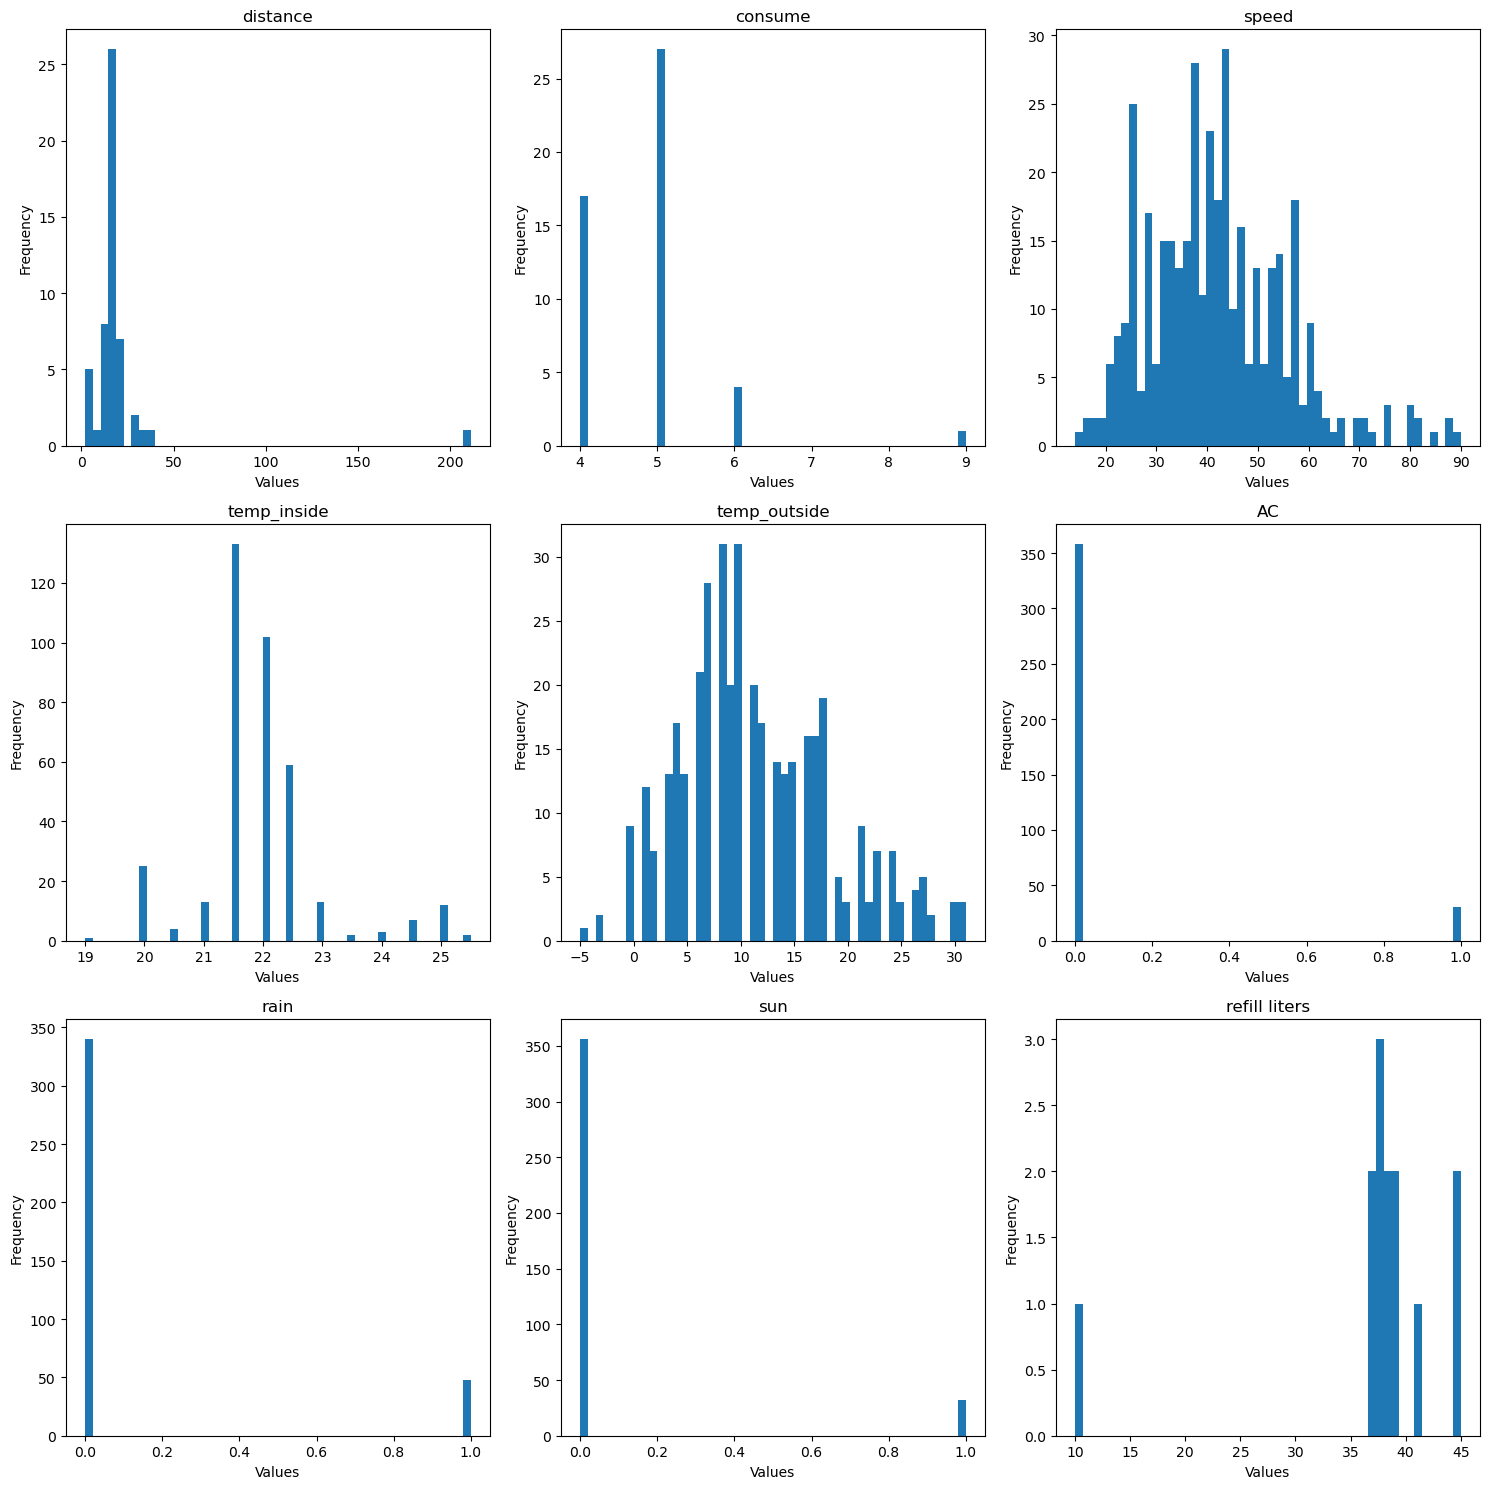

In [11]:
# Plot histograms for numerical columns
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3, ncols=3, figsize=(15, 15))

for i, column in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]  # Get the appropriate subplot
    
    # Exclude non-numeric values from the histogram
    numeric_values = gas_consum_df[column].loc[pd.to_numeric(gas_consum_df[column], errors='coerce').notnull()]
    
    ax.hist(numeric_values, bins=50)
    ax.set_title(column)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

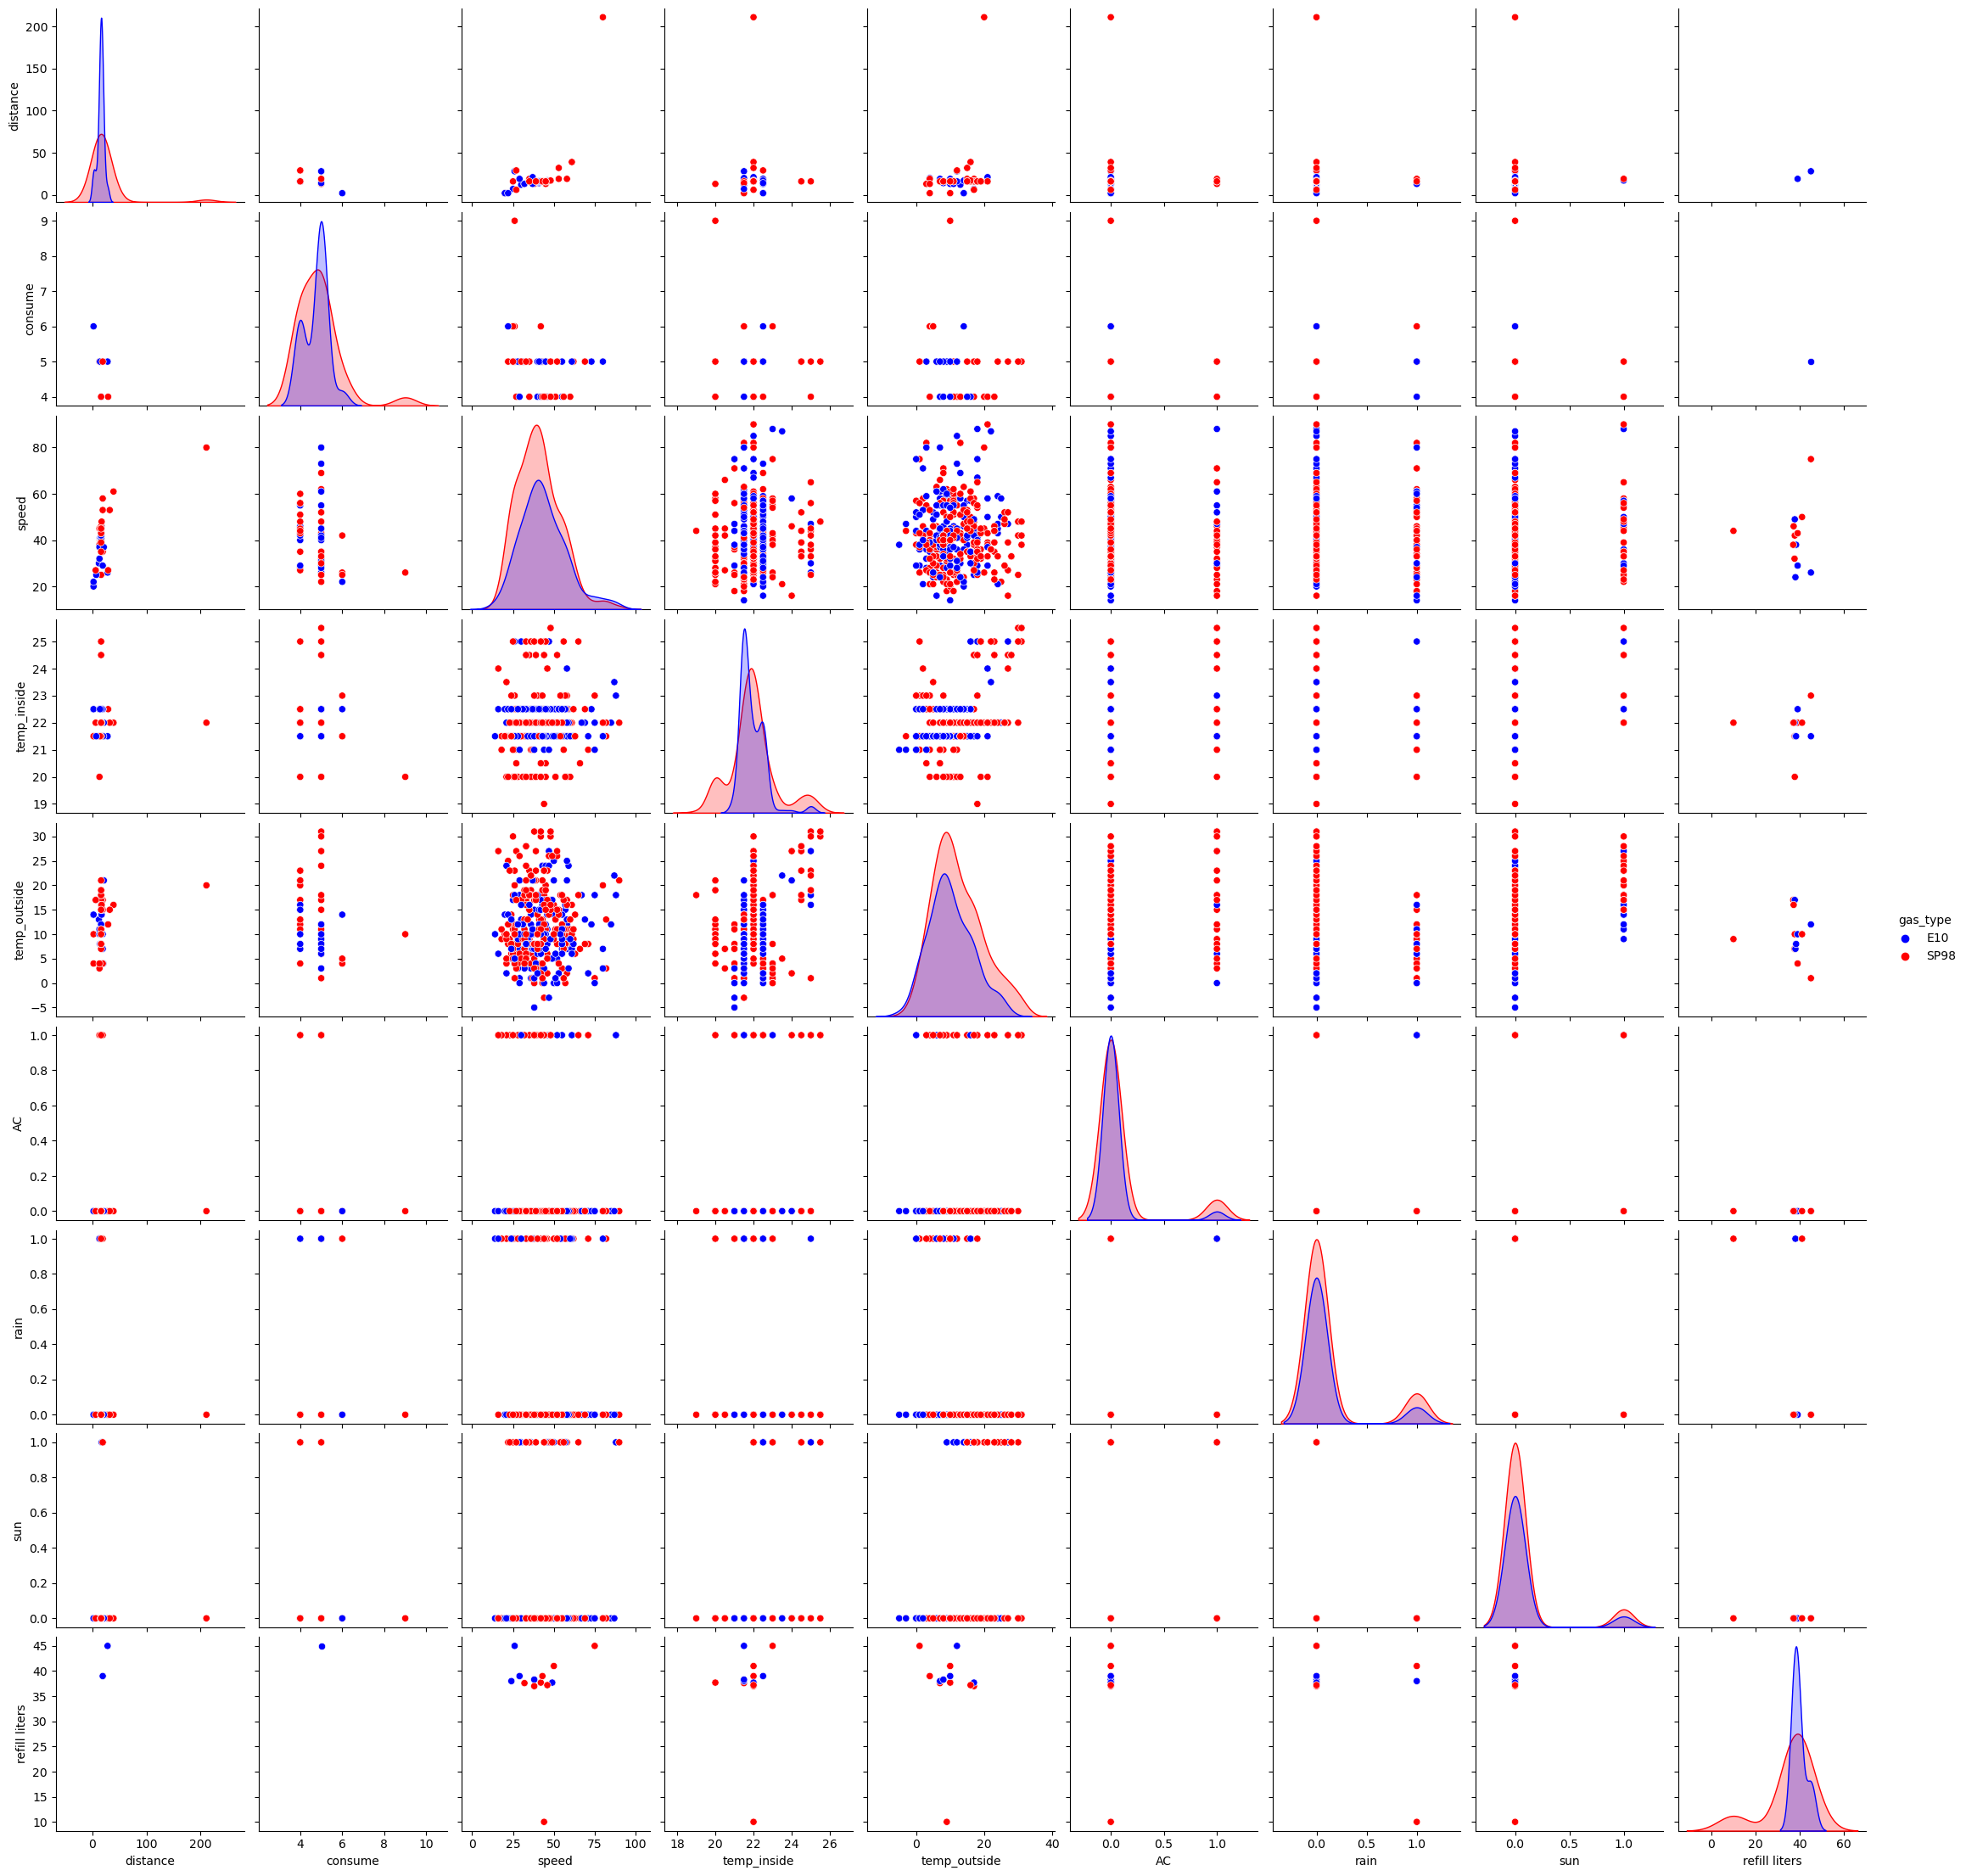

In [12]:
# Create a pair plot, showing data filtered by gas type
sns.pairplot(gas_consum_df, hue='gas_type', palette={'E10': 'blue', 'SP98': 'red'})

# Display the plot
plt.show()

In [13]:
#Encode gas_type

gas_consum_df = pd.get_dummies(gas_consum_df, columns=['gas_type'])

gas_consum_df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,AC,rain,sun,refill liters,refill gas,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,NaN,0,0,0,45.0,E10,1,0
1,12.0,NaN,30,21.5,13,NaN,0,0,0,NaN,NaN,1,0
2,NaN,NaN,38,21.5,15,NaN,0,0,0,NaN,NaN,1,0
3,NaN,NaN,36,21.5,14,NaN,0,0,0,NaN,NaN,1,0
4,NaN,NaN,46,21.5,15,NaN,0,0,0,NaN,NaN,1,0


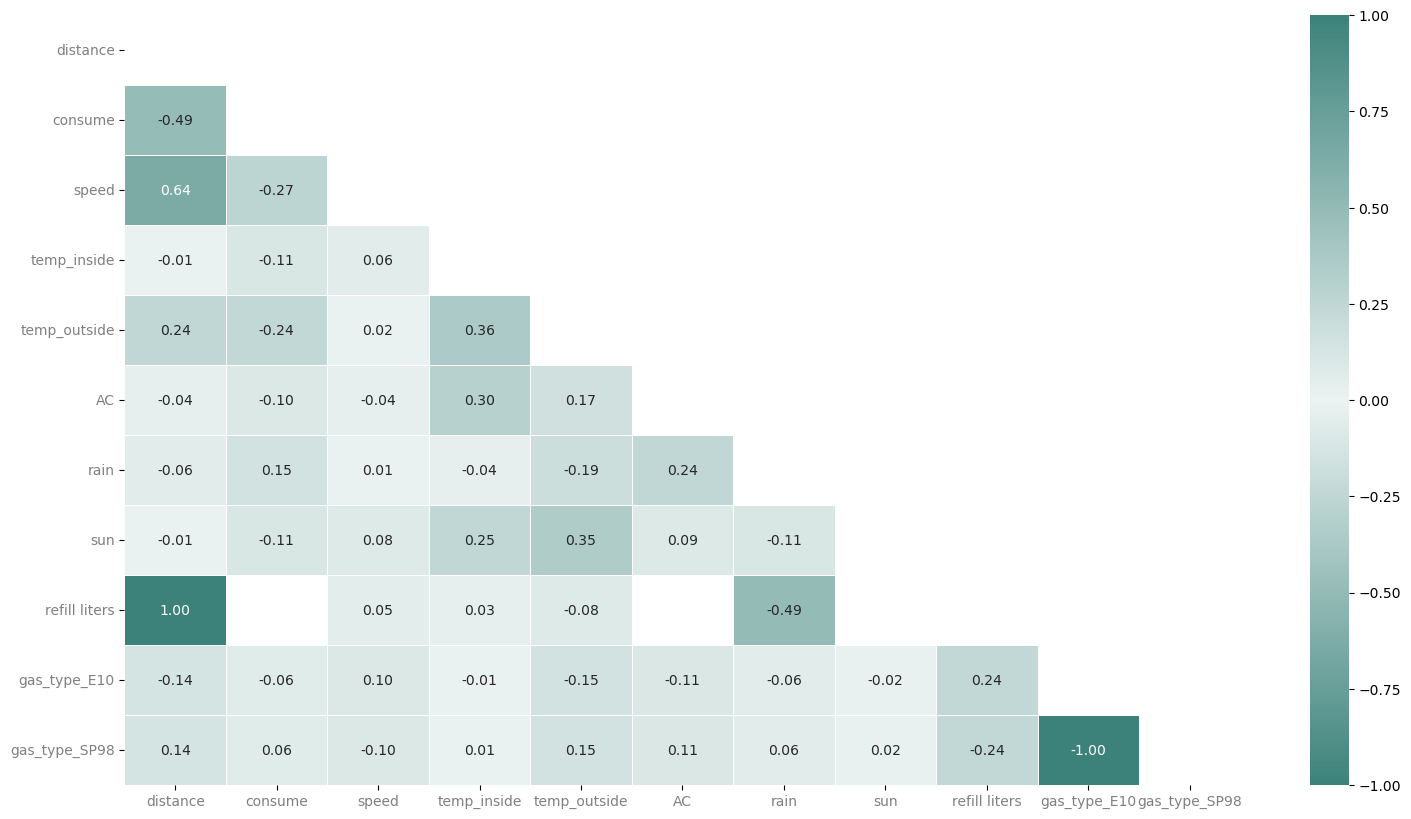

In [14]:
#Plot correlation matrix

correlations_matrix = gas_consum_df.corr()
fig, ax = plt.subplots(figsize=(18, 10))

mask = np.zeros_like(correlations_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(180, 180, as_cmap=True)
g = sns.heatmap(correlations_matrix, mask=mask, fmt=".2f", cmap=cmap, linewidths=.5, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()